In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Task 1: Exploratory Data Analysis (EDA)

In [3]:
# Load dataset
df = pd.read_csv(r'C:\Users\admin\Downloads\Excelr Assignment\PCA\PCA\wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# Basic info
df.shape

(178, 14)

In [5]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# To check missing values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


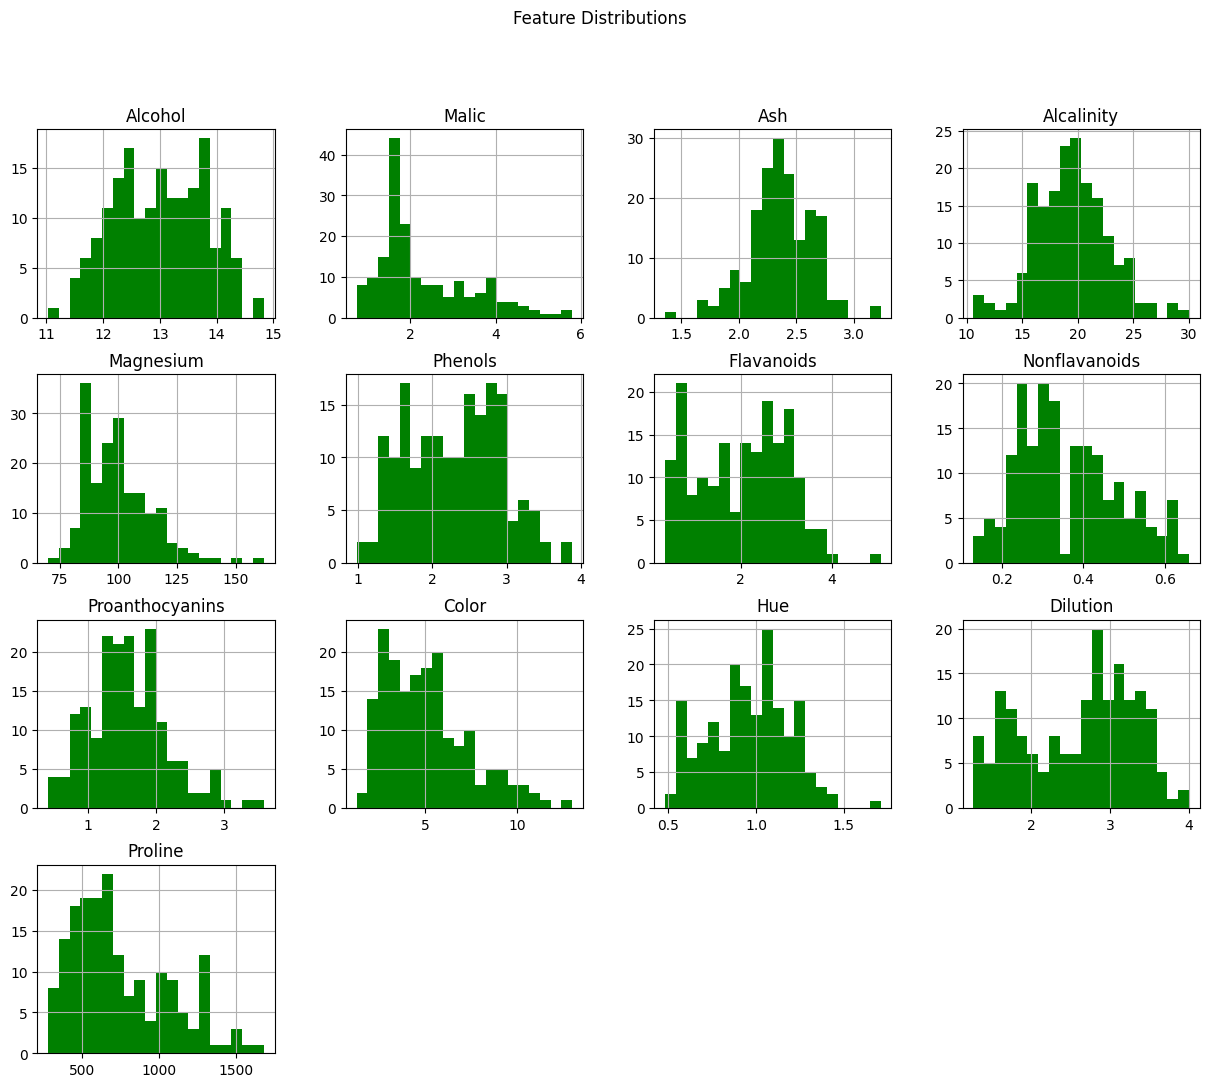

In [9]:
# 1. Distribution of features
# Histograms of features
df.drop('Type', axis=1).hist(bins=20, figsize=(15, 12),color='g')
plt.suptitle("Feature Distributions")
plt.show()


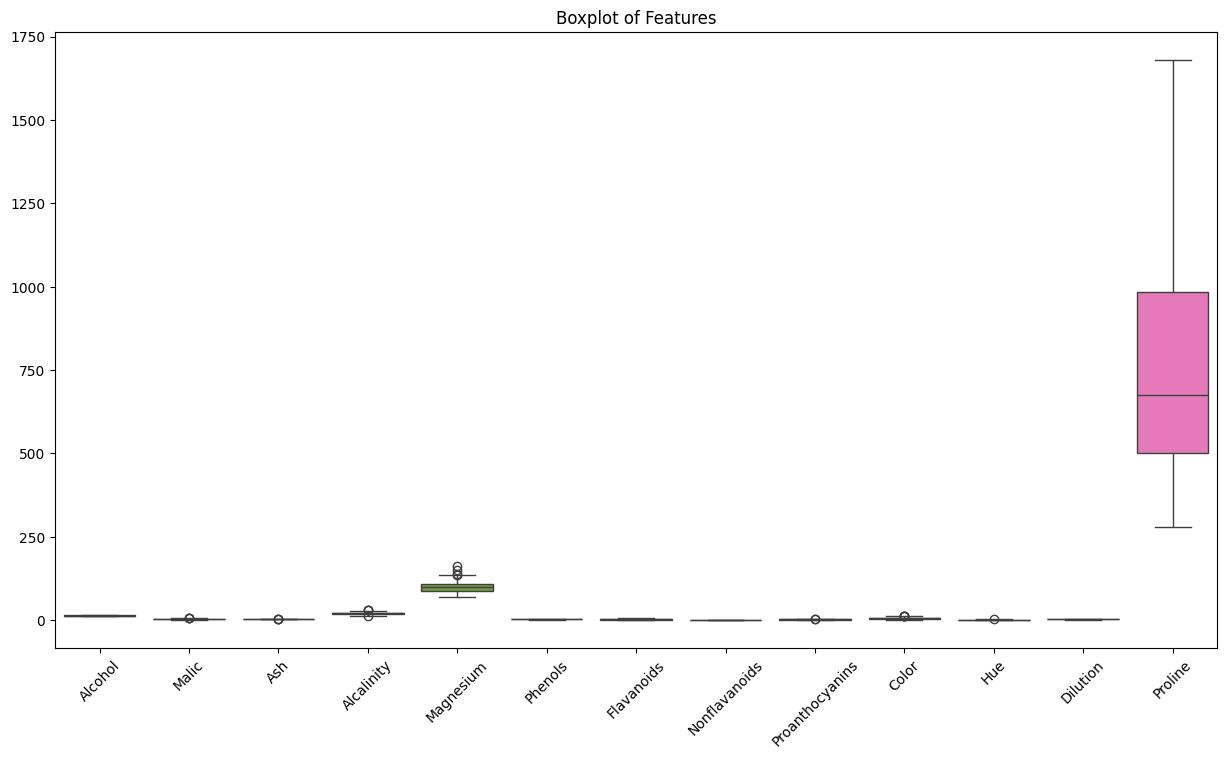

In [10]:
# 2. Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

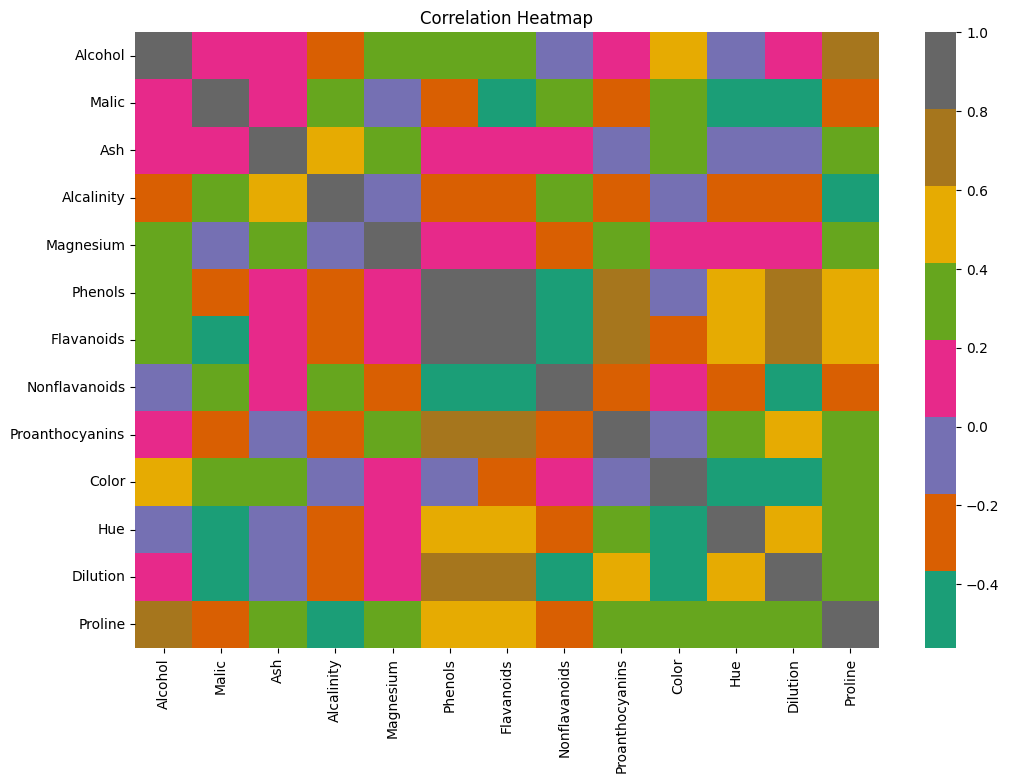

In [11]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('Type', axis=1).corr(), annot=False, cmap="Dark2")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Task 2: Dimensionality Reduction with PCA

In [13]:
# Separate features & target
X = df.drop("Type", axis=1)
y = df["Type"]

In [14]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# PCA transformation
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

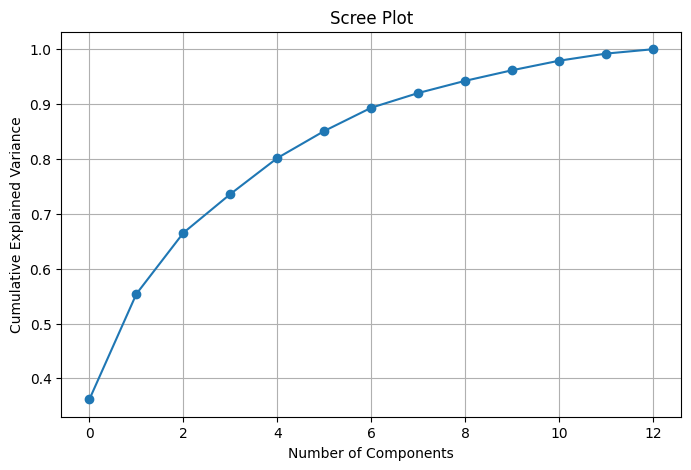

In [16]:
# Scree plot - explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [17]:
# Choose optimal number of components (95% variance)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of components (95% variance): {n_components}")

Optimal number of components (95% variance): 10


In [18]:
# Transform data with optimal PCA
pca = PCA(n_components=n_components)
X_pca_opt = pca.fit_transform(X_scaled)

In [19]:
# Task 3: Clustering with Original Data

In [20]:
# Apply KMeans clustering
kmeans_orig = KMeans(n_clusters=3, random_state=42)
kmeans_orig_labels = kmeans_orig.fit_predict(X_scaled)

In [21]:
# Evaluate clustering
sil_orig = silhouette_score(X_scaled, kmeans_orig_labels)
db_orig = davies_bouldin_score(X_scaled, kmeans_orig_labels)
print(f"Original Data - Silhouette Score: {sil_orig:.3f}, Davies-Bouldin Index: {db_orig:.3f}")

Original Data - Silhouette Score: 0.285, Davies-Bouldin Index: 1.389


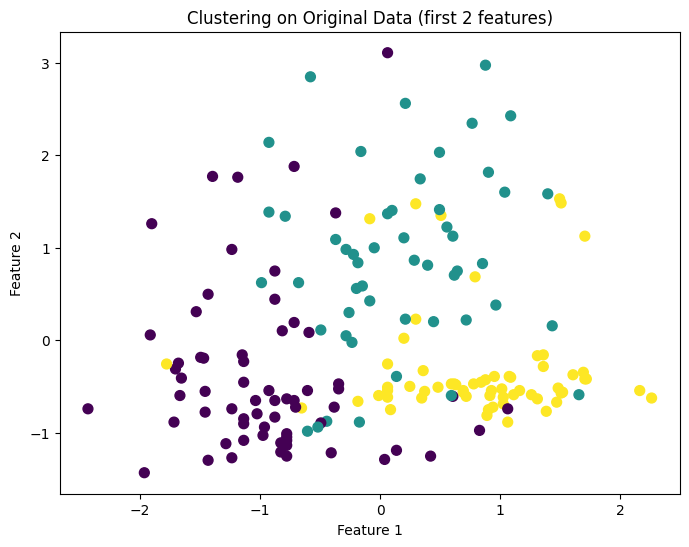

In [22]:
# Visualization (using first 2 features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_orig_labels, cmap='viridis', s=50)
plt.title("Clustering on Original Data (first 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [23]:
# Task 4: Clustering with PCA Data

In [24]:
# Apply KMeans on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca_opt)

In [25]:
# Evaluate clustering
sil_pca = silhouette_score(X_pca_opt, kmeans_pca_labels)
db_pca = davies_bouldin_score(X_pca_opt, kmeans_pca_labels)
print(f"PCA Data - Silhouette Score: {sil_pca:.3f}, Davies-Bouldin Index: {db_pca:.3f}")

PCA Data - Silhouette Score: 0.299, Davies-Bouldin Index: 1.336


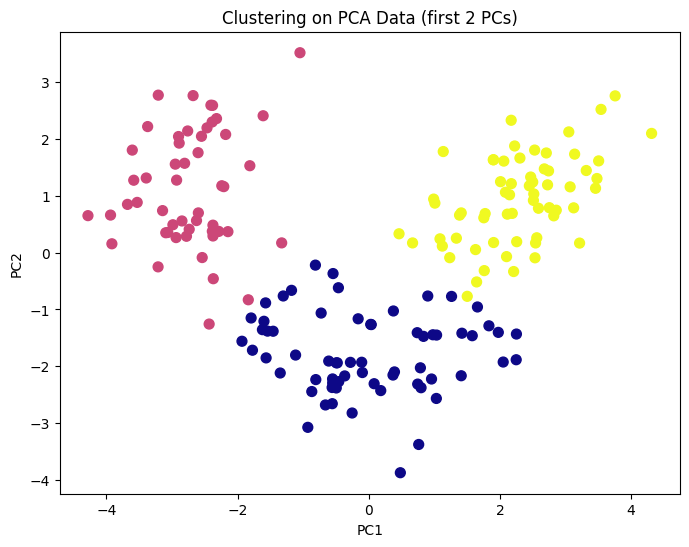

In [26]:
# Visualization (using first 2 PCA components)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_opt[:, 0], X_pca_opt[:, 1], c=kmeans_pca_labels, cmap='plasma', s=50)
plt.title("Clustering on PCA Data (first 2 PCs)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [27]:
# Task 5: Comparison and Analysis

In [28]:
print("\nComparison:")
print(f"Original Data - Silhouette: {sil_orig:.3f}, Davies-Bouldin: {db_orig:.3f}")
print(f"PCA Data - Silhouette: {sil_pca:.3f}, Davies-Bouldin: {db_pca:.3f}")


if sil_pca > sil_orig:
    print("PCA improved clustering quality (higher Silhouette Score).")
else:
    print("Original data performed better or similar.")


Comparison:
Original Data - Silhouette: 0.285, Davies-Bouldin: 1.389
PCA Data - Silhouette: 0.299, Davies-Bouldin: 1.336
PCA improved clustering quality (higher Silhouette Score).


In [29]:
# Task 6: Conclusion & Insights

In [30]:
print("\nInsights:")
print("- PCA reduced dimensionality while retaining most variance.")
print("- Clustering performance can improve with PCA by reducing noise & redundancy.")
print("- Trade-off: PCA loses some interpretability of original features.")
print("- Recommendation: Use PCA when dataset has high dimensionality or correlated features.")


Insights:
- PCA reduced dimensionality while retaining most variance.
- Clustering performance can improve with PCA by reducing noise & redundancy.
- Trade-off: PCA loses some interpretability of original features.
- Recommendation: Use PCA when dataset has high dimensionality or correlated features.
